In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('Outlier & partial missing.csv')

In [3]:
df.head()

,Title,Bedrooms,Bathrooms,Floor_area,City,location_area,Price_in_Cr,Price_per_sqft,floor_level
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,1960.0,dhaka,gulshan,3.90,19897.96,low
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1705.0,dhaka,kalabagan,1.69,9912.02,low
2,1370 square feet apartment is ready to sale in...,3.0,3.0,1370.0,dhaka,dhanmondi,1.25,9124.09,medium
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,2125.0,dhaka,bashundhara,2.00,9411.76,medium
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,2687.0,dhaka,banani,4.75,17677.71,medium


# Univariate Analysis

# (1) Bedrooms

In [4]:
fig = px.pie(data_frame=df['Bedrooms'].value_counts(),names=df['Bedrooms'].value_counts().index,
       values=df['Bedrooms'].value_counts(),width=500,height=500,hole=0.2)

fig.update_layout(title_text='Bedrooms',title_x=0.5)
fig.show()

Bedroom is not an important column as there is not much of a variety  
78% Houses have 3 bedrooms 

# (2) Bathrooms

In [5]:
fig = px.bar(y=df['Bathrooms'].value_counts(),width=800,height=400)

fig.update_layout(title_text='Bathrooms',title_x=0.5,xaxis_title='Bathrooms',yaxis_title='Count')
fig.show()

In [6]:
fig = px.pie(data_frame=df['Bathrooms'].value_counts(),names=df['Bathrooms'].value_counts().index,
       values=df['Bathrooms'].value_counts(),width=500,height=500,hole=0.2)

fig.update_layout(title_text='Bathrooms',title_x=0.5)
fig.show()

63% of the Houses has 3 Bedrooms 
And the majority belongs to 3,2 & 4

# (3) Floor_area

In [7]:
df['Floor_area'].describe()

count    2092.000000
mean     1419.369981
std       495.730011
min       250.000000
25%      1150.000000
50%      1350.000000
75%      1570.000000
max      6509.000000
Name: Floor_area, dtype: float64

Skewness: 2.7233326516172034
Kurtosis: 16.57475629831312


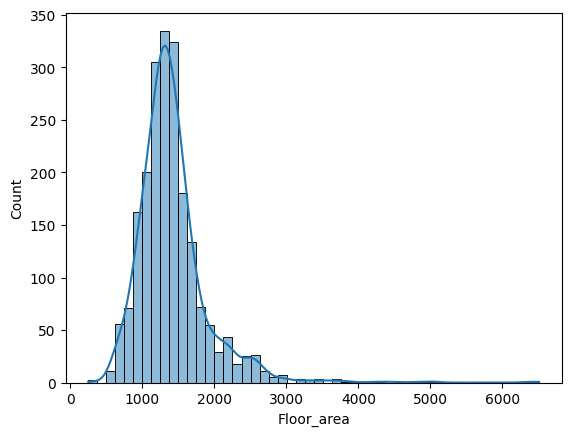

In [8]:
sns.histplot(df['Floor_area'],kde=True,bins=50)
print(f'Skewness: {df["Floor_area"].skew()}')
print(f'Kurtosis: {df["Floor_area"].kurt()}')


Skewness: 0.30008255860689254
Kurtosis: 2.1673603716171166


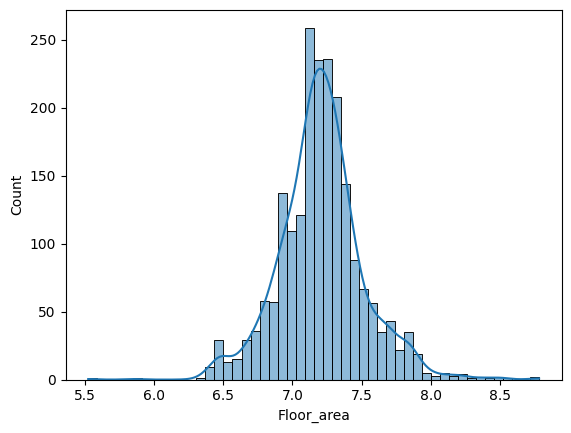

In [9]:
sns.histplot(np.log1p(df['Floor_area']),kde=True,bins=50)
print(f'Skewness: {np.log1p(df["Floor_area"]).skew()}')
print(f'Kurtosis: {np.log1p(df["Floor_area"]).kurt()}')

In [10]:
px.box(df,x='Floor_area',width=800,height=400)

In [11]:
px.box(x=np.log1p(df['Price_in_Cr']),width=800,height=400)

Floor_area is right skewed and the kurtosis value is greater than 3 so even after cleaning the outliers there are some genuine extreme values. 
We can use log transformation to reduce the Skewness here  
The mean value is 1419

 # (4) City

In [12]:
fig = px.pie(data_frame=df['City'].value_counts(),names=df['City'].value_counts().index,
       values=df['City'].value_counts(),width=500,height=500,hole=0.2)

fig.update_layout(title_text='City',title_x=0.5)
fig.show()

 Most of the Houses are Based on Dhaka and Chattogram

# (5) Location Area

In [13]:
df['location_area'].value_counts().head(10)

location_area
mirpur                   397
gazipur sadar upazila    131
bashundhara              111
double mooring           109
bakalia                  106
bayazid                   93
uttara                    73
khulshi                   72
north pahartali ward      66
bagmoniram ward           56
Name: count, dtype: int64

In [14]:
fig = px.bar(x=df['location_area'].value_counts().head(10).index,y=df['location_area'].value_counts().head(10),width=800,height=400)
fig.update_layout(title_text='location_area',title_x=0.5,xaxis_title='location_area',yaxis_title='Count')
fig.show()

Mirpur Has the highest Number of Houses

# (6) Price_in_Cr

In [15]:
df['Price_in_Cr'].describe()

count    2109.000000
mean        0.931859
std         0.741166
min         0.180000
25%         0.530000
50%         0.710000
75%         1.080000
max         7.800000
Name: Price_in_Cr, dtype: float64

Skewness: 3.6700822763304974
Kurtosis: 19.292766563749513


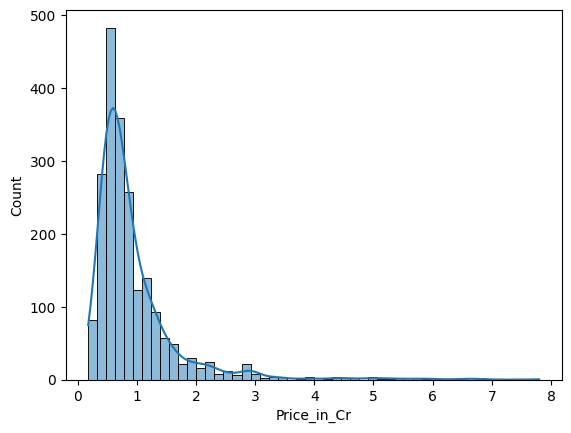

In [16]:
sns.histplot(df['Price_in_Cr'],kde=True,bins=50)
print(f'Skewness: {df["Price_in_Cr"].skew()}')
print(f'Kurtosis: {df["Price_in_Cr"].kurt()}')

Skewness: 1.7792482767994844
Kurtosis: 4.383352143050519


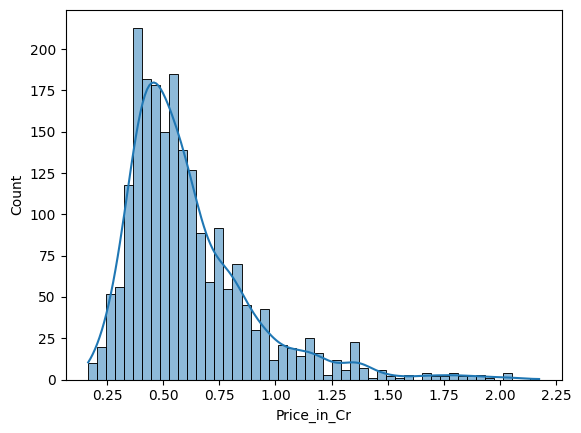

In [17]:
sns.histplot(np.log1p(df['Price_in_Cr']),kde=True,bins=50)
print(f'Skewness: {np.log1p(df["Price_in_Cr"]).skew()}')
print(f'Kurtosis: {np.log1p(df["Price_in_Cr"]).kurt()}')

In [18]:
px.box(x=df['Price_in_Cr'],width=800,height=400)

In [19]:
px.box(x=np.log1p(df['Price_in_Cr']),width=800,height=400)


Same as the Floor Area column , we can use log transformation to redeuce the outliers and skewness  
The Average price is 0.93 Cr

# (7) Price_per_sqft 

Skewness: 2.3551084424685946
Kurtosis: 9.733170080399134


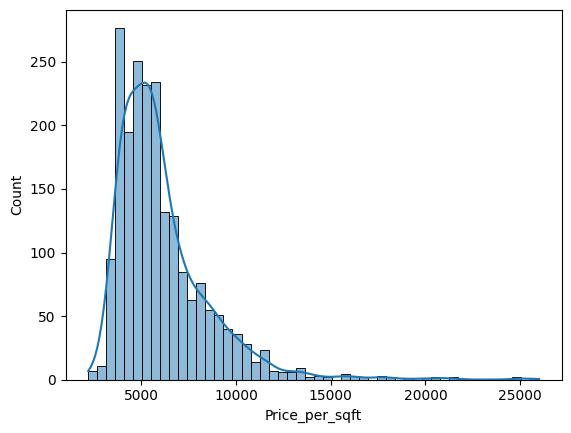

In [20]:
sns.histplot(df['Price_per_sqft'],kde=True,bins=50)
print(f'Skewness: {df['Price_per_sqft'].skew()}')
print(f'Kurtosis: {df['Price_per_sqft'].kurt()}')

Skewness: 0.7353049929090023
Kurtosis: 0.8090572936988001


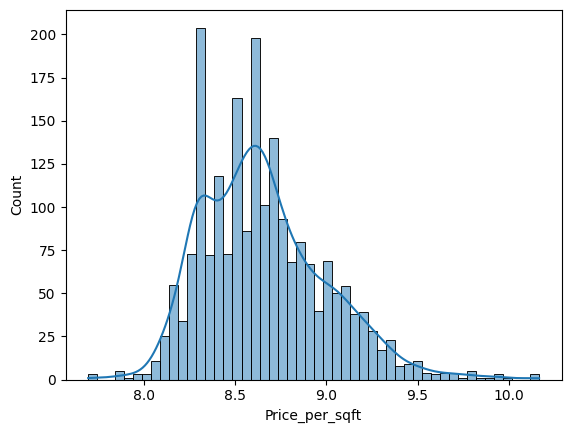

In [21]:
sns.histplot(np.log1p(df['Price_per_sqft']),kde=True,bins=50)
print(f'Skewness: {np.log1p(df['Price_per_sqft']).skew()}')
print(f'Kurtosis: {np.log1p(df['Price_per_sqft']).kurt()}')

In [22]:
px.box(x=df['Price_per_sqft'],width=800,height=400)

In [23]:
px.box(x=np.log1p(df['Price_per_sqft']),width=800,height=400)

Log transformation is needed for converging to normal distribution and outlier removal

# (8) floor_level

In [24]:
fig = px.pie(data_frame=df['floor_level'].value_counts(),names=df['floor_level'].value_counts().index,
             values=df['floor_level'].value_counts(),width=500,height=500,hole=0.2)

fig.update_layout(title_text='floor_level',title_x=0.5)

55% of houses are on medium level 

# Feature Engineering

In [25]:
df['Is_in_Dhaka'] = df['City'].apply(lambda x : 'yes' if x == 'dhaka' else 'no')

In [26]:
fig = px.pie(data_frame=df['Is_in_Dhaka'].value_counts(),names=df['Is_in_Dhaka'].value_counts().index,
             values=df['Is_in_Dhaka'].value_counts(),width=500,height=500,hole=0.2)

fig.update_layout(title_text='Is_in_Dhaka',title_x=0.5)

46% houses are in dhaka 

# Bi & Multivariate Analysis

# (2) Bathrooms , Bedrooms & Price 

In [27]:

fig = px.imshow(pd.crosstab(df['Bedrooms'],df['Bathrooms']),text_auto=True,width=500,height=500,color_continuous_scale='Hot')
fig.update_layout(title_text='Bedrooms vs Bathrooms',title_x=0.5)
fig.show()

The combination of 3 bedrooms and 3 bathrooms are the highest.  
2nd highest combination is 2 bedrooms and 2 bathrooms

In [28]:
fig = px.imshow(pd.pivot_table(df,index='Bedrooms',columns='Bathrooms',values='Price_in_Cr',aggfunc='mean'),
          text_auto=True,width=600,height=600,color_continuous_scale='Inferno')
fig.update_layout(title_text='Bedrooms vs Bathrooms & Price',title_x=0.5)
fig.show()

The Highest Average Price is 4.24 Cr for 6 Bedrooms with 4 Bathrooms  
The Lowest Average Price is 0.2 Cr for 3 Bedrooms with 1 Bathrooms 

# (3) Bedrooms vs City

In [29]:
fig = px.imshow(pd.crosstab(df['City'],df['Bedrooms']),text_auto=True,width=500,height=500,color_continuous_scale='Inferno')
fig.update_layout(title_text='City vs Bedrooms',title_x=0.5)
fig.show()

Chattogram and Dhaka has the highest number houses with 3 Bedrooms with equal number 690 

In [30]:
fig = px.imshow(pd.pivot_table(df,index='City',columns='Bedrooms',values='Price_in_Cr',aggfunc='mean'),
          text_auto=True,width=600,height=600,color_continuous_scale='Inferno')
fig.update_layout(title_text='City vs Bedrooms & Price',title_x=0.5)
fig.show()

Average price of Houses with 5 and 6 Bedrooms are higher in Dhaka.  
The only house with 7 bedrooms has a lower price than 5 & 6 bedrooms , which is also in dhaka! This might be an outlier , so let's remove it 

In [31]:
df = df[~(df['Bedrooms'] == 7)]

In [32]:
df.columns

Index(['Title', 'Bedrooms', 'Bathrooms', 'Floor_area', 'City', 'location_area',
       'Price_in_Cr', 'Price_per_sqft', 'floor_level', 'Is_in_Dhaka'],
      dtype='object')

# (3) Floor Area

Text(0.5, 1.0, 'Bedrooms vs Floor_area')

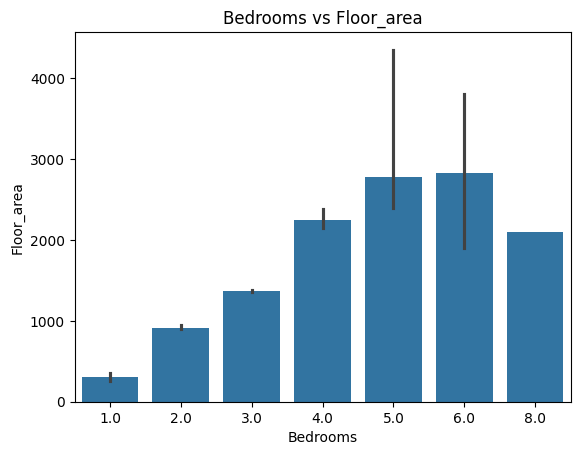

In [33]:
sns.barplot(x=df['Bedrooms'],y=df['Floor_area'],estimator=np.median)
plt.title('Bedrooms vs Floor_area')

In [34]:
df.drop(index=[713,186],inplace=True)

Text(0.5, 1.0, 'Bedrooms vs Floor_area')

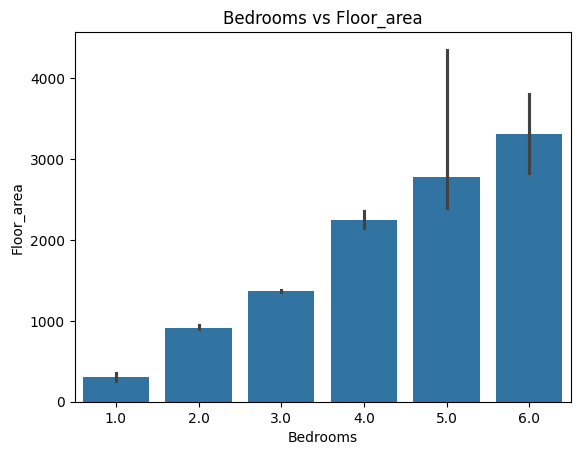

In [35]:
sns.barplot(x=df['Bedrooms'],y=df['Floor_area'],estimator=np.median)
plt.title('Bedrooms vs Floor_area')

Text(0.5, 1.0, 'Bathrooms vs Floor_area')

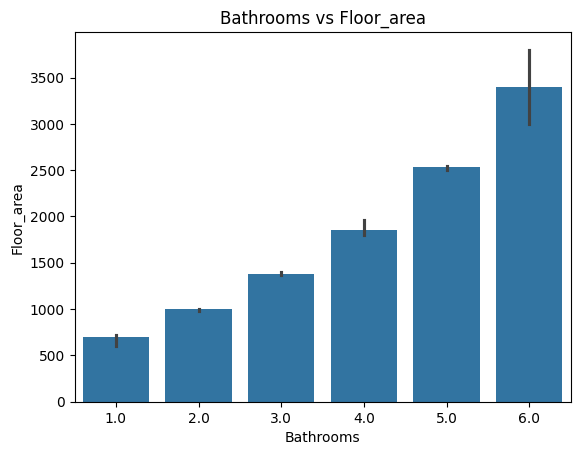

In [36]:
sns.barplot(x=df['Bathrooms'],y=df['Floor_area'],estimator=np.median)
plt.title('Bathrooms vs Floor_area')

Text(0.5, 1.0, 'City vs Floor_area')

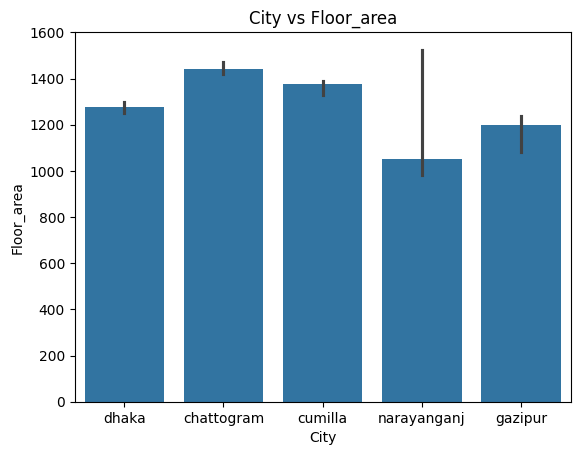

In [37]:
sns.barplot(x=df['City'],y=df['Floor_area'],estimator=np.median)
plt.title('City vs Floor_area')

Chattogram has the highest of Median floor area available  
Narayanganj has the lowest of median floor area available

Text(0.5, 1.0, 'floor_level vs Floor_area')

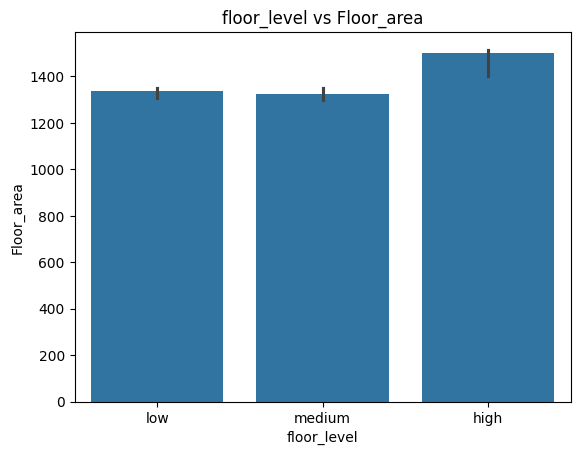

In [38]:
sns.barplot(x=df['floor_level'],y=df['Floor_area'],estimator=np.median)
plt.title('floor_level vs Floor_area')

High Rise Houses has higher median Floor area

In [39]:
fig = px.imshow(pd.crosstab(index=df['Bedrooms'],columns=df['location_area']),
        width=1000,height=500,color_continuous_scale='Inferno')
fig.update_layout(title_text='Bedrooms vs location_area',title_x=0.5)
fig.show()

Mirpur locality has the highest number of houses with 2 & 3 Bedrooms.

(1) Chattogram has the highest number of high rising floors with highest floor_area  
(2) Gazipur has the lowest number of low rising floors with lowest floor_area

In [40]:
fig = px.imshow(pd.crosstab(df['Bedrooms'],df['floor_level']),text_auto=True,width=800,height=400,color_continuous_scale='Inferno')
fig.update_layout(title_text='Bedrooms vs floor_level',title_x=0.5)
fig.show()

Medium Rising floors has the highest number of 3 Bedrooms flat 

In [41]:
fig = px.imshow(pd.pivot_table(data=df,index=df['Bedrooms'],columns=df['floor_level'],values='Price_in_Cr',aggfunc='mean'),
          text_auto=True,width=800,height=400,color_continuous_scale='Inferno')
fig.update_layout(title_text='Bedrooms vs floor_level & Price',title_x=0.5)

Highest mean price is for Medium rising 6 Bedrooms houses  
2nd highest mean price is for High rising 5 Bedrooms houses

# Target Column

Text(0.5, 1.0, 'Bathrooms vs Price')

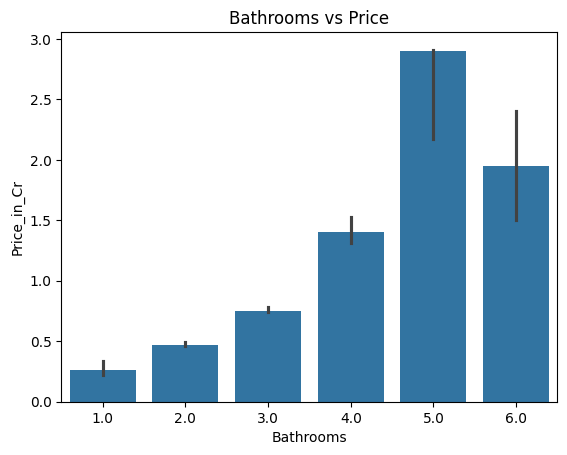

In [42]:
sns.barplot(y=df['Price_in_Cr'],x=df['Bathrooms'],estimator=np.median)
plt.title('Bathrooms vs Price')

Prices were increasing with Bathrooms but suddenly it droped at 6 bathroom , weird.

In [43]:
df[df['Bathrooms'] == 6]

,Title,Bedrooms,Bathrooms,Floor_area,City,location_area,Price_in_Cr,Price_per_sqft,floor_level,Is_in_Dhaka
1055,3000 Sq Ft Apartment Is Ready For Sale At 18 N...,4.0,6.0,3000.0,chattogram,bakalia,1.5,5000.00,medium,no
1631,3800 Sq Ft Apartment Is Now Ready To Sell In 1...,6.0,6.0,3800.0,chattogram,north kattali ward,2.4,6315.79,low,no


There are lot's of Houses with Bedrooms less than Bathrooms

In [44]:
fig =px.scatter(y=df['Price_in_Cr'],x=df['Floor_area'],width=800,height=400,trendline='lowess')
fig.update_layout(title_text='Floor_area vs Price',title_x=0.5,xaxis_title='Floor_area',yaxis_title='Price')
fig.show()

Prices are increasing with floor_area which is normal  
The relationship is linear

In [45]:
fig = px.scatter(y=df['Price_in_Cr'],x=df['Floor_area'],color=df['City'],width=800,height=400,trendline='lowess')
fig.update_layout(title_text='Floor_area vs Price vs City',title_x=0.5,xaxis_title='Floor_area',yaxis_title='Price')
fig.show()

Prices are higher in Dhaka in floor_area compare to other region

In [46]:
fig = px.scatter(y=df['Price_in_Cr'],x=df['Floor_area'],color=df['floor_level'],width=800,height=400,trendline='lowess')
fig.update_layout(title_text='Floor_area vs Price vs floor_level',title_x=0.5,xaxis_title='Floor_area',yaxis_title='Price')
fig.show()

In [47]:
df[((df['floor_level'] == 'high') & (df['Floor_area'] >4000))]

,Title,Bedrooms,Bathrooms,Floor_area,City,location_area,Price_in_Cr,Price_per_sqft,floor_level,Is_in_Dhaka
103,5040 Sq. Ft Apartment Which Is Up For Sale At ...,4.0,4.0,5040.0,dhaka,bashundhara,5.4,10714.29,high,yes
138,4350 Sq Ft Modern And Spacious Flat For Sale I...,5.0,5.0,4350.0,dhaka,uttara,5.7,13103.45,high,yes
1143,A Nicely Constructed Apartment Of 6509 Sq Ft I...,4.0,5.0,6509.0,chattogram,bagmoniram ward,6.5,9986.17,high,no


The Floor_area values seems like outliers with values greater than 4000 sqft. I don't know what to do with those!  
let's keep them 

In [48]:
df = df[~((df['Is_in_Dhaka'] == 'no') & (df['Floor_area'] > 4000))]

In chattogram bhaghmonirhat , there are 2 flats with extreme high value of Floor_area  
greater than 4500 sqft , let's remove those

In [49]:
fig = px.scatter(y=df['Price_in_Cr'],x=df['Floor_area'],color=df['Is_in_Dhaka'],width=800,height=400,trendline='lowess')
fig.update_layout(title_text='Floor_area vs Price vs Is_in_Dhaka',title_x=0.5,xaxis_title='Floor_area',yaxis_title='Price')
fig.show()

In [50]:
fig =px.scatter(y=df['Price_in_Cr'],x=df['Price_per_sqft'],width=800,height=400,trendline='lowess')
fig.update_layout(title_text='Price_per_sqft vs Price',title_x=0.5,xaxis_title='Price_per_sqft',yaxis_title='Price')
fig.show()

The relationship between Price and Price per sqft is linear which is normal to assume

In [51]:
df = df[~((df['City'].isin(['cumilla'])) & (df['Price_per_sqft'] > 6000))]

Found an outlier value for cumilla with price per sqft is at 10k , which is a business space. Removing that row

In [52]:
df = df[~((df['City'].isin(['gazipur'])) & (df['Price_per_sqft'] > 6000))]

Found an outlier value for gazipur with price per sqft is at 12.5k , which is a warehouse. Removing that row

In [53]:
fig =px.scatter(y=df['Price_in_Cr'],x=df['Price_per_sqft'],color=df['City'],width=800,height=400,trendline='lowess')
fig.update_layout(title_text='Price_per_sqft vs Price vs City',title_x=0.5,xaxis_title='Price_per_sqft',yaxis_title='Price')
fig.show()

In Dhaka , the spread between price and price per sqft is higher  
The spread in chattogram is more stable compare to other region  
cumilla and gazipur have a non linear trend

In [54]:
fig = px.scatter(y=df['Price_in_Cr'],x=df['Price_per_sqft'],color=df['floor_level'],width=800,height=400,trendline='lowess')
fig.update_layout(title_text = 'Price_per_sqft vs Price vs floor_level',title_x=0.5,xaxis_title='Price_per_sqft',yaxis_title='Price')
fig.show()

The price vs Price per sqft relation is non-linear for High Rising floors

In [55]:
df[((df['floor_level'].isin(['medium'])) & (df['Price_per_sqft'] > 24000))]

,Title,Bedrooms,Bathrooms,Floor_area,City,location_area,Price_in_Cr,Price_per_sqft,floor_level,Is_in_Dhaka
752,2700 Square Feet Apartment Is Ready For Sale I...,3.0,3.0,2700.0,dhaka,banani dohs,6.75,25000.0,medium,yes
753,2700 Square Feet Great Apartment For Sale In B...,3.0,3.0,2700.0,dhaka,banani dohs,6.75,25000.0,medium,yes


In [56]:
df[df['location_area'] == 'banani dohs']

,Title,Bedrooms,Bathrooms,Floor_area,City,location_area,Price_in_Cr,Price_per_sqft,floor_level,Is_in_Dhaka
228,Notable 2500 Square Feet Apartment For Sale In...,3.0,3.0,2500.0,dhaka,banani dohs,6.50,26000.0,low,yes
752,2700 Square Feet Apartment Is Ready For Sale I...,3.0,3.0,2700.0,dhaka,banani dohs,6.75,25000.0,medium,yes
753,2700 Square Feet Great Apartment For Sale In B...,3.0,3.0,2700.0,dhaka,banani dohs,6.75,25000.0,medium,yes


In [57]:
fig = px.scatter(y=df['Price_in_Cr'],x=df['Price_per_sqft'],color=df['Is_in_Dhaka'],width=800,height=400,trendline='lowess')
fig.update_layout(title_text = 'Price_per_sqft vs Price vs Is_in_Dhaka',title_x=0.5,xaxis_title='Price_per_sqft',yaxis_title='Price')
fig.show()

<Axes: xlabel='City', ylabel='Price_in_Cr'>

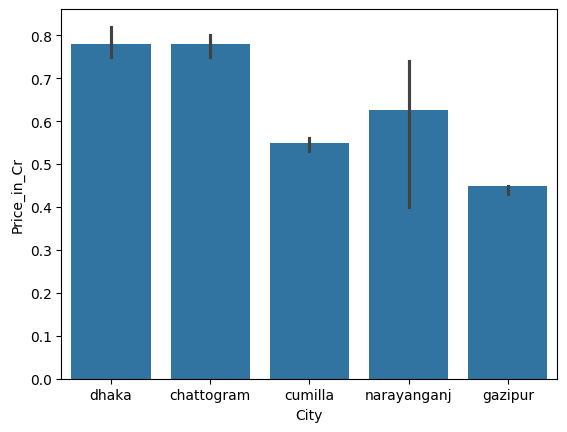

In [58]:
sns.barplot(data=df,y='Price_in_Cr',x='City',estimator=np.median)

Dhaka and Chattogram has simillar median price in Cr around 80 lacs  
Gazipur has the lowest median price in Cr around 40 lacs 

<Axes: xlabel='Is_in_Dhaka', ylabel='Price_in_Cr'>

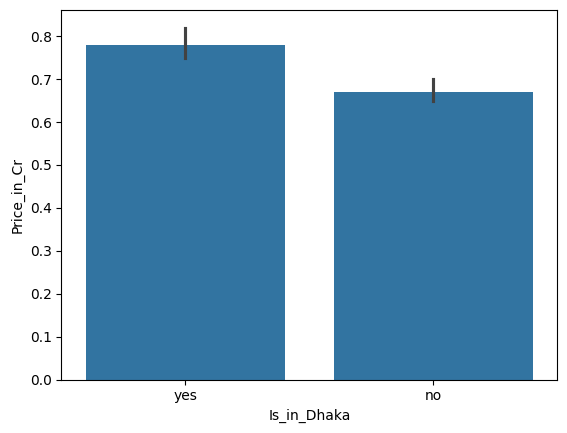

In [59]:
sns.barplot(data=df,y='Price_in_Cr',x='Is_in_Dhaka',estimator=np.median)

Dhaka has higher median price than other region combined



### 🏠 **General Observations**
- **Bedrooms**: Not a strong differentiator — **78%** of houses have **3 bedrooms**, and **63%** have **3 bathrooms**. Most combinations are **3 beds & 3 baths**, followed by **2 beds & 2 baths**.
- **Floors**: Majority of houses are on **2, 3, or 4 floors**.
- **Regions**: Most houses are located in **Dhaka** and **Chattogram**, with **Mirpur** having the highest concentration.



### 📊 **Numerical Features**
#### **Floor Area**
- **Right-skewed** distribution with **kurtosis > 3**, indicating presence of genuine extreme values.
- **Mean floor area**: ~1419 sqft.
- **Log transformation** recommended to reduce skewness and manage outliers.
- **Outliers**:
  - Values > 4000 sqft are potential outliers but retained.
  - **Bhaghmonirhat (Chattogram)** has 2 extreme values > 4500 sqft — removed.

#### **Price**
- **Average price**: ~0.93 Cr.
- **Log transformation** suggested for normalization and outlier handling.
- **Highest average price**: 4.24 Cr for **6 beds & 4 baths**.
- **Lowest average price**: 0.2 Cr for **3 beds & 1 bath**.
- **Price increases with floor area** — **linear relationship**.

#### **Price per Sqft**
- **Highly correlated** with target price.
- **Outliers**:
  - **Cumilla**: 10k/sqft (business space) — removed.
  - **Gazipur**: 12.5k/sqft (warehouse) — removed.
- **Linear relationship** with price overall, but **non-linear** for **high-rise floors**.



### 🏢 **Location-Based Insights**
- **Dhaka & Chattogram**: Highest number of houses with 3 bedrooms (690 each).
- **Dhaka**: Higher median price than other regions combined.
- **Gazipur**: Lowest median price (~40 lacs).
- **Chattogram**: More stable price-per-sqft spread.
- **Cumilla & Gazipur**: Show **non-linear** trends in price vs. price-per-sqft.


### 🏗️ **Building Type Insights**
- **High-rise houses**: Higher median floor area.
- **Medium-rise houses**:
  - Most common for 3-bedroom flats.
  - Highest mean price for 6-bedroom units.
- **Low-rise houses**: Least floor area, especially in Gazipur.


### 🛁 **Bathroom Trends**
- Price generally increases with number of bathrooms, but drops unexpectedly at **6 bathrooms** — possibly an anomaly.
- Some houses have **more bathrooms than bedrooms**, which is unusual.



# Missing_Value_Imputation

In [60]:
df['Bedrooms'].fillna(df['Bedrooms'].median(),inplace=True)

In [61]:
df['Bathrooms'].fillna(df['Bathrooms'].median(),inplace=True) 

In [62]:
df['floor_level'].fillna(df['floor_level'].mode()[0],inplace=True)


In [63]:
df['Floor_area'].fillna(df['Floor_area'].median(),inplace=True)

In [64]:
df['Price_per_sqft'].fillna(df['Price_per_sqft'].median(),inplace=True)

In [66]:
df['Price_in_Cr'].isnull().sum()

np.int64(0)

In [65]:
df.to_csv('final_data.csv',index=False)